# Task 2

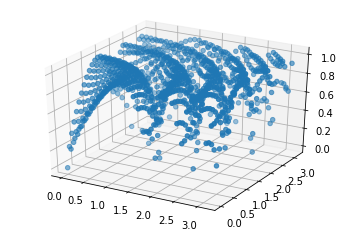

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



r2 score: 0.909438
Maximum residual error: 1.738397
Mean absolute percentage error: 0.185271 
Loss function value: 0.005328
Number of iterations: 7519
Number of layers: 6


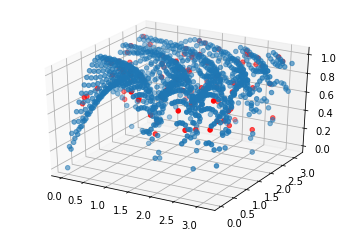

In [2]:
# imports
from sklearn.metrics import r2_score, max_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# seed for reproducibility
np.random.seed(1)

# reading data from .csv file
with open("train.csv") as file_name:
    data = np.loadtxt(file_name, delimiter=",")
inputData = data[:, :-1]  # all columns except the last one
outputData = data[:, -1]  # last column

# plotting the original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1],data[:,2]) # original data (will be blue)
plt.show()

# preprocessing by standardization
scaleIn = preprocessing.StandardScaler().fit(inputData)
scaleOut = preprocessing.StandardScaler().fit(outputData.reshape(-1,1))
inputData = scaleIn.transform(inputData)
outputData = scaleOut.transform(outputData.reshape(-1,1))

# splitting into training and test sets
in_train, in_test, out_train, out_test = train_test_split(inputData, outputData)

# neural network
model = neural_network.MLPRegressor(activation='tanh', 
                                    solver = 'lbfgs', 
                                    alpha = 0.023, 
                                    batch_size = 'auto', 
                                    learning_rate = 'constant', 
                                    random_state = None,
                                    max_iter = 10000,
                                    warm_start = True,
                                    max_fun = 15000,
                                    hidden_layer_sizes=(100,50,50,25))

model.fit(in_train, out_train)

# predicting on the test set
out_pred = model.predict(in_test)

# evaluation metrics
print('\nr2 score: %f' % r2_score(out_test, out_pred))
print("Maximum residual error: %f" % max_error(out_test, out_pred))
print("Mean absolute percentage error: %f " % mean_absolute_percentage_error(out_test, out_pred))
print("Loss function value: %f" % model.loss_)
print("Number of iterations: %d" % model.n_iter_)
print("Number of layers: %d" % model.n_layers_)

# read the .csv file with the validation data
valData = pd.read_csv('Val_Regression.csv').to_numpy()

# scaling of the validation data
XVal = scaleIn.transform(valData)

# using the trained model to predict the outcome
yVal_pred = model.predict(XVal)

# retransform the predicted values
yVal_pred = scaleOut.inverse_transform(yVal_pred.reshape(-1,1))

# visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valData[:,0],valData[:,1],yVal_pred, c='r') #validation data in red
ax.scatter(data[:,0], data[:,1],data[:,2]) # original data (will be blue)
plt.show()

In [3]:
# validation data together with the predicted values
print(np.c_[valData,yVal_pred])

[[0.27004381 2.69275584 0.95239798]
 [1.13900376 3.10944362 0.99965286]
 [1.65658127 0.53022201 0.44275061]
 [0.21151243 1.79953066 0.48098152]
 [2.04588448 2.2476863  0.54898524]
 [3.05909794 1.75434711 0.4205514 ]
 [2.23122427 3.00713572 0.99634548]
 [0.37981652 1.36097705 0.96973651]
 [3.07684472 2.87044652 0.97477173]
 [2.1779318  1.06121165 0.73973223]
 [0.08866095 0.55929614 0.68275636]
 [0.94106477 2.93277806 0.37717139]
 [2.80511506 1.77451698 1.00023731]
 [0.90687491 2.08483278 0.96781888]
 [2.79587118 2.6746685  0.87545128]
 [2.00084672 1.66597067 0.78462538]
 [1.4628078  0.02483771 0.94481053]
 [0.16002358 2.1636404  1.00165174]
 [2.13676527 0.21377609 0.99965125]
 [1.26918231 3.09530728 0.98819309]
 [1.57405507 2.34381223 0.99834183]
 [0.37980074 1.08498796 0.98809962]
 [2.44908759 2.9931216  0.87348689]
 [0.99574069 2.76496235 0.89426673]
 [0.65795635 1.77132392 0.74344117]
 [2.12255309 0.15126809 0.99699589]
 [2.45469102 0.65561178 0.54642614]
 [2.38441614 0.13007298 0.81

In [7]:
# GridSearchCV example 
# WARNING: minutes of runtime

# imports
from sklearn.model_selection import GridSearchCV

# choosing parameters to compare
param_list = {"learning_rate": ["invscaling", "constant"], 
              "activation": ["tanh", "relu"]}  # or any other combinations
gridCV = GridSearchCV(estimator=model, param_grid=param_list, return_train_score = False)

# fitting
gridCV.fit(in_train,out_train)
cv_predict = gridCV.predict(in_test)

# visualisation
gridresults = pd.DataFrame(gridCV.cv_results_)
gridresults.drop(labels = ["params", "std_fit_time", "mean_fit_time", "mean_score_time", "std_score_time", "std_test_score"], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/d

,param_activation,param_learning_rate,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,tanh,invscaling,0.918143,0.937895,0.805854,0.927872,0.926539,0.903261,1
1,tanh,constant,0.917309,0.886722,0.641206,0.932946,0.870761,0.849789,2
2,relu,invscaling,0.745391,0.534964,0.733327,0.554150,0.693982,0.652363,3
3,relu,constant,0.834460,0.387420,0.123823,0.492469,0.514004,0.470435,4
